## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
X.info() #нулевые значения отсутствуют, категориальные переменные отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

<AxesSubplot:xlabel='alcohol', ylabel='magnesium'>

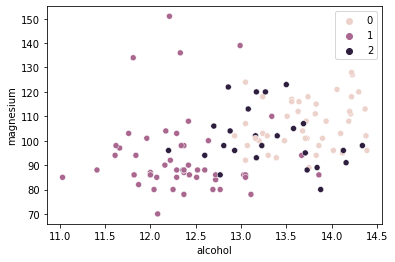

In [6]:
import seaborn as sns
sns.scatterplot(x = X_train["alcohol"], y = X_train["magnesium"], hue=y_train)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
lst = [1,3,5,10,15,25]
a = StandardScaler().fit_transform(X_train[["alcohol", "magnesium"]])
b = StandardScaler().fit_transform(X_test[["alcohol", "magnesium"]])
clas = []
print("NN     Train    Test")
for k in lst:
    y1_predicted = KNeighborsClassifier(n_neighbors=k).fit(a, y_train).predict(a)
    val1_accuracy = np.mean(y1_predicted==y_train)
    clas.append(y1_predicted)
    y2_predicted = KNeighborsClassifier(n_neighbors=k).fit(a, y_train).predict(b)
    val2_accuracy = np.mean(y2_predicted==y_test)
    print(f"{k:2.0f}     {val1_accuracy:.2f}     {val2_accuracy:.2f}")

NN     Train    Test
 1     1.00     0.56
 3     0.83     0.61
 5     0.81     0.63
10     0.79     0.54
15     0.74     0.57
25     0.76     0.56


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

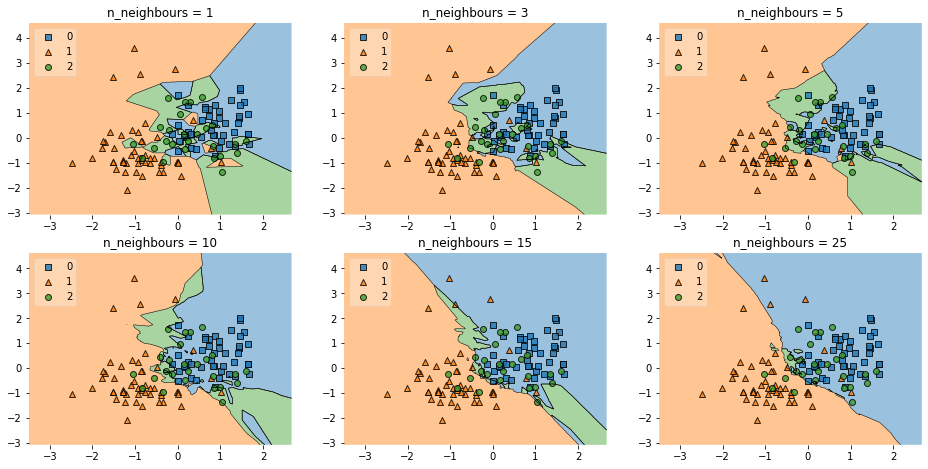

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(16,12))

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = KNeighborsClassifier(n_neighbors=10)
clf5 = KNeighborsClassifier(n_neighbors=15)
clf6 = KNeighborsClassifier(n_neighbors=25)

X = np.array(a)
y = y_train

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Исходя из результатов, полученных в заданиях 1.3 и 1.5, можно сделать вывод, что оптимальным числом соседей является k=5. С точки зрения решающих поверхностей, при данном k графики получились не такими сложными и чувствительными к выбросам, как при k=1, но и не такими простыми, как при k=25, где, например, из-за большого количества синих точек практически отсутствует область влияния зеленых. Результат доли правильных предсказаний из задания 1.3 подтверждает данный вывод.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

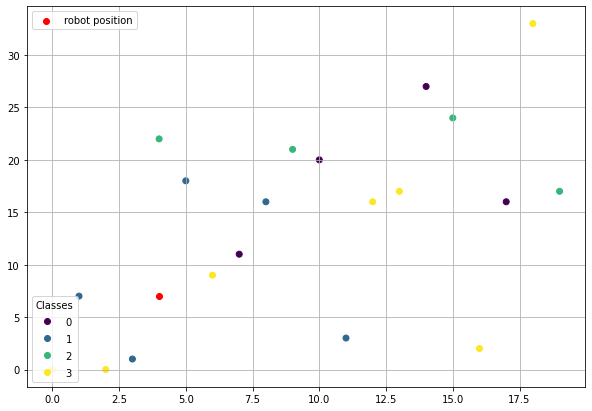

In [11]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
class MobileRobot():
    
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = []
        self.trajectory.append(initial_position)
        
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
    
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the historys
        '''
        self.cur= np.array(self.trajectory[len(self.trajectory)-1])
        s = np.random.binomial(1, 0.2)
        if s == 1:
            self.cur[0] += 1
            self.trajectory.append(tuple([self.cur[0], self.cur[1]]))
        else:
            tr = self.knn.predict(self.cur.reshape(1, -1))
            self.cur[0] += self.mapping[tr[0]][0]
            self.cur[1] += self.mapping[tr[0]][1]
            self.trajectory.append(tuple([self.cur[0], self.cur[1]]))
            
    def get_traj(self):
        return self.trajectory

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [14]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T

    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.get_traj())
    ax.plot(traj[:, 0], traj[:, 1], 
                 c = 'r', marker = 'o', label = 'robot position')
    
    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

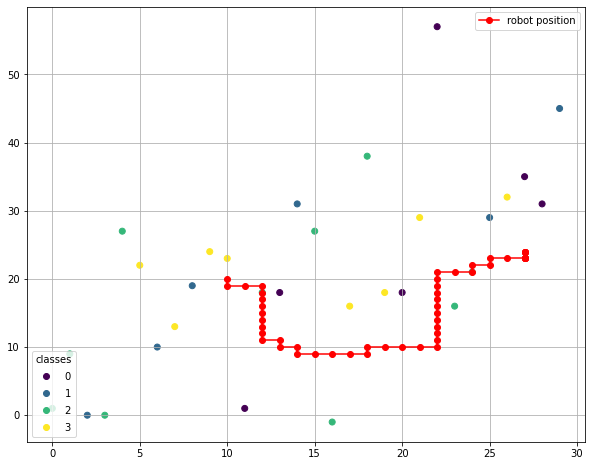

In [15]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

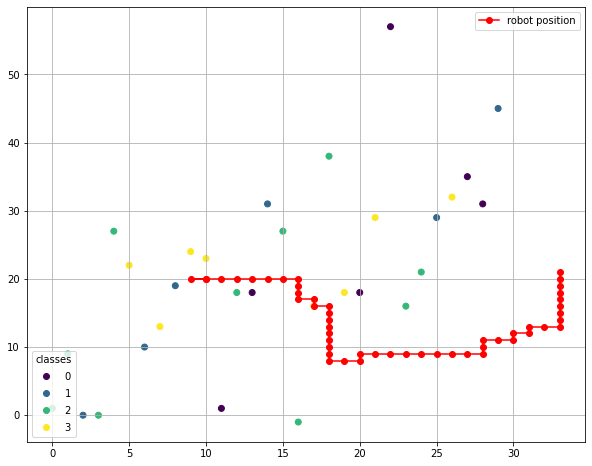

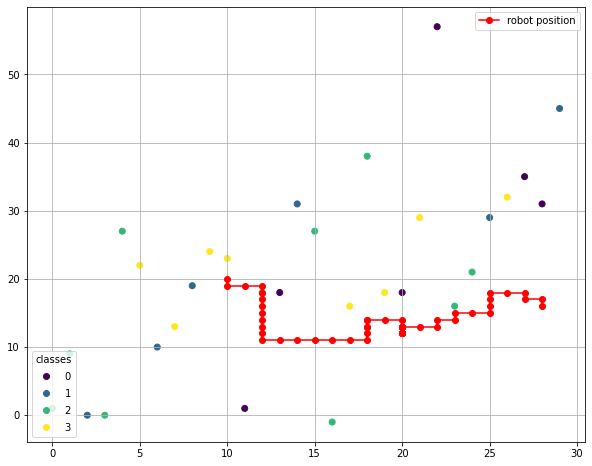

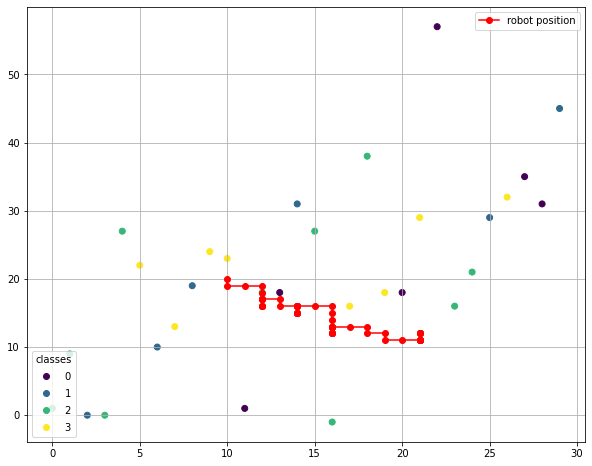

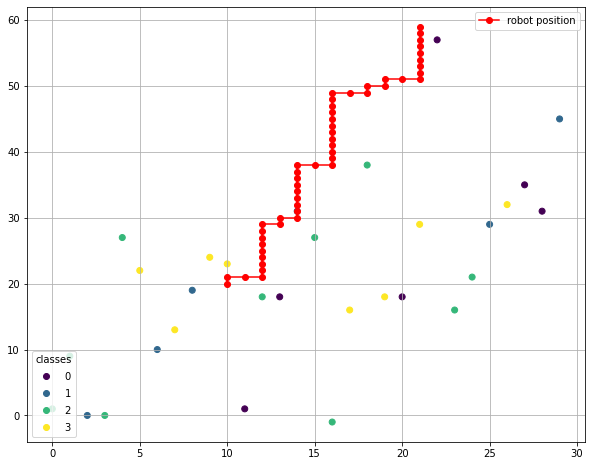

In [16]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

Из четырех вышеприведенных графиков, а также графика из задания 2.3, можно заметить, что траектории движения имеют общие черты: робот движется слева-направо, периодически спускаясь и поднимаясь по координате y. Это говорит о том, что точки служат своего рода ориентирами для робота. Если задать их не случайным образом, можно построить маршрут, которого будет придерживаться робот, чуть чуть изменяя траекторию за счет рандома. Увелечение количества соседей упрощает траеткорию движения робота, так как на каждую точку влияет не локальный набор, а глобальный(например, при k=30 робот при использовании метода оценки ближайших соседей всегда будет двигаться в том направлении, на какое укажут все "ориентиры", и это направление никогда не изменится)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [17]:
data = pd.read_csv('D://diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [18]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [19]:
# Можно заметить, что в таблице присутствует столбец "Unnamed: 0", который не несет никакой информации и служит для индексации строк, его можно удалить 
pd.DataFrame(data).pop('Unnamed: 0')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [20]:
data.corr()
# Больше всего с целевой переменной коррелируют признаки, отвечающие за размер(x, y, z), а также признак carat

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
data = pd.get_dummies(data, ['cut', 'color', 'clarity'])
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [22]:
np.random.seed(12345)
y = data.price
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [23]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_train_norm = pd.DataFrame(normalizer.fit_transform(X_train))
X_test_norm = pd.DataFrame(normalizer.fit_transform(X_test))
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.927373,-0.311238,1.133187,-1.082573,-1.029988,-1.057217,-0.173873,-0.316707,-0.814777,1.705964,...,-0.333392,4.305040,-0.115374,-0.185497,1.761475,-0.453000,-0.422363,-0.539407,-0.269292,-0.324393
1,-0.167973,0.247483,0.242202,-0.004751,0.020092,0.040537,-0.173873,-0.316707,-0.814777,1.705964,...,-0.333392,-0.232286,-0.115374,-0.185497,1.761475,-0.453000,-0.422363,-0.539407,-0.269292,-0.324393
2,1.245357,-0.660439,-0.203290,1.340300,1.321474,1.194586,-0.173873,-0.316707,1.227330,-0.586179,...,-0.333392,-0.232286,-0.115374,-0.185497,-0.567706,-0.453000,-0.422363,1.853887,-0.269292,-0.324393
3,-0.990657,-0.660439,0.242202,-1.127111,-1.164614,-1.169808,-0.173873,-0.316707,-0.814777,1.705964,...,-0.333392,-0.232286,-0.115374,-0.185497,-0.567706,-0.453000,-0.422363,1.853887,-0.269292,-0.324393
4,0.971129,0.387164,-0.203290,1.010718,1.061198,1.067922,-0.173873,-0.316707,1.227330,-0.586179,...,-0.333392,-0.232286,-0.115374,-0.185497,-0.567706,-0.453000,-0.422363,-0.539407,-0.269292,3.082681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-0.484390,-1.358840,0.687695,-0.307610,-0.294034,-0.437972,-0.173873,-0.316707,-0.814777,-0.586179,...,-0.333392,4.305040,-0.115374,5.390928,-0.567706,-0.453000,-0.422363,-0.539407,-0.269292,-0.324393
37754,1.076601,-0.171558,-1.094275,1.144333,1.177873,1.110143,-0.173873,-0.316707,1.227330,-0.586179,...,-0.333392,-0.232286,-0.115374,-0.185497,-0.567706,-0.453000,2.367629,-0.539407,-0.269292,-0.324393
37755,0.422673,3.390291,0.687695,0.298109,0.244469,0.673856,5.751314,-0.316707,-0.814777,-0.586179,...,-0.333392,-0.232286,-0.115374,-0.185497,-0.567706,2.207504,-0.422363,-0.539407,-0.269292,-0.324393
37756,0.570334,0.177643,-0.648783,0.690044,0.729121,0.772373,-0.173873,-0.316707,1.227330,-0.586179,...,-0.333392,-0.232286,-0.115374,-0.185497,-0.567706,2.207504,-0.422363,-0.539407,-0.269292,-0.324393


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(X_train_norm, y_train)
y_predict = model.predict(X_train_norm)
y_pred = model.predict(X_test_norm)
print(mean_squared_error(y_train, y_predict))
print(mean_squared_error(y_test, y_pred))

1296113.8146618737
7.633707902654547e+28


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [25]:
for f, c in zip(X_train, model.coef_):
    print(f, c)
# оценки коэффицентов качественных переменных, закодированных при помощи One-hot кодирования, сильно отличаются от оценок прочих вещественных переменных.

carat 5368.853195314233
depth -99.08450503703921
table -65.40356488505574
x -1578.2137225692677
y 454.09921843565223
z -32.773809082298726
cut_Fair 1321828696946910.2
cut_Good 2254353766300043.5
cut_Ideal 3835295501629723.5
cut_Premium 3416925813813831.5
cut_Very Good 3269370860136274.5
color_D -2532553081039161.0
color_E -2946913914557066.5
color_F -2910186757110386.5
color_G -3091876625860687.0
color_H -2744920206701729.5
color_I -2285403405260715.5
color_J -1678727970818721.5
clarity_I1 2453634527595466.5
clarity_IF 3864462572612199.5
clarity_SI1 9252130476183542.0
clarity_SI2 8099923825943278.0
clarity_VS1 7723993035635345.0
clarity_VS2 9004276495936691.0
clarity_VVS1 5410825612891521.0
clarity_VVS2 6325041848104876.0


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [26]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
model1 = Lasso(10).fit(X_train_norm, y_train)
y_predict1 = model1.predict(X_train_norm)
print(mean_squared_error(y_train, y_predict1))


1307725.9983572743


In [27]:
print(model1.coef_)

[4910.85000518  -69.30907969  -52.5668992  -687.64834607   -0.
  -38.41303451 -118.10179115  -43.89538359   41.67608363    0.
   -0.          149.79957729   92.44744253   66.41975307   -0.
 -170.4904848  -280.16907688 -406.54610389 -474.73983707  194.16161987
 -264.51140317 -591.102748     95.23827407   -0.          185.53536031
  198.36406786]


In [28]:
ridge = Ridge(10).fit(X_train_norm,y_train)
y_predict2 = ridge.predict(X_train_norm)
print(mean_squared_error(y_train, y_predict2))

1296042.3146045445


In [29]:
print(ridge.coef_)

[ 5.32843413e+03 -9.74116156e+01 -6.51912968e+01 -1.37535857e+03
  2.87684884e+02 -3.73220012e+01 -1.14847193e+02 -4.41914176e+01
  5.00918708e+01  1.95529749e+01 -2.29303626e+00  2.12902072e+02
  1.61967421e+02  1.36077212e+02  5.52826973e+01 -1.27490938e+02
 -2.52248958e+02 -3.91358311e+02 -4.56821911e+02  2.47249040e+02
 -1.53770985e+02 -5.03325188e+02  2.00327956e+02  1.06753442e+02
  2.55527135e+02  2.80442768e+02]


В обоих случаях оценки коэффицентов значительно уменьшились с точки зрения абсолютных значений. Это говорит о том, что модель, обученная при помощи обычной линейной регрессии, переобучилась. Поэтому можно сделать вывод, что проблема мультиколлинеарности в изначальной регрессии проявлялась достаточно сильно и делала модель практически бесполезной(что и подтверждает среднеквадратичная ошибка на тестовой выборке)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

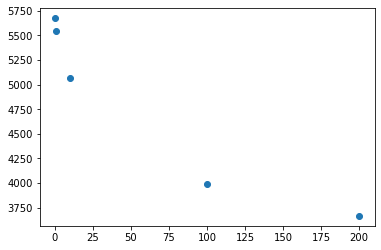

In [30]:
import warnings
warnings.filterwarnings("ignore")
a = [0.1, 1, 10, 100, 200]
coef_las = []
for i in a:
    lasso = Lasso(i).fit(X_train_norm, y_train)
    coef_las.append(np.linalg.norm(lasso.coef_))
plt.scatter(a,coef_las)
plt.show()

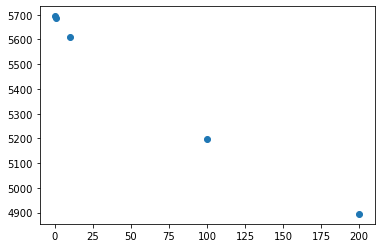

In [31]:
coef_r = []
for i in a:
    ridge = Ridge(i).fit(X_train_norm,y_train)
    coef_r.append(np.linalg.norm(ridge.coef_))
plt.scatter(a,coef_r)
plt.show()

In [32]:
#Агрессивнее веса уменьшает метод Lasso. Помимо этого, данный метод склонен к занулению некоторых параметров при больших lamda.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

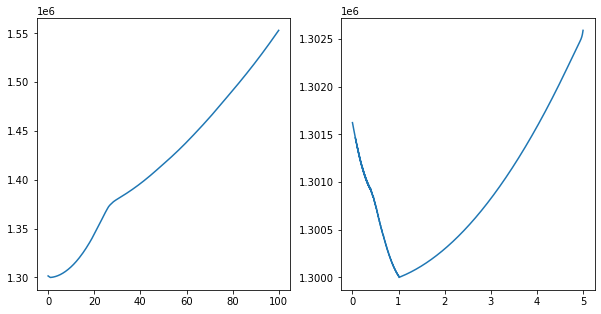

In [33]:
from sklearn.linear_model import LassoCV
fig, ax = plt.subplots(1, 2)
lst1 = np.arange(0.001, 100, 0.1)
model3 = LassoCV(cv=5, alphas=lst1).fit(X_train_norm, y_train)
ax[0].plot(model3.alphas_, model3.mse_path_.mean(axis=1))
lst2 = np.arange(0.001, 5, 0.001)
model4 = LassoCV(cv=5, alphas=lst2).fit(X_train_norm, y_train)
ax[1].plot(model4.alphas_, model4.mse_path_.mean(axis=1))
fig.set_figwidth(10)
fig.set_figheight(5)
plt.show()

In [34]:
#Из графиков видно, что наибольшее качетсво достигается при а=1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [35]:
model3 = Lasso(1).fit(X_train_norm, y_train)
for f, c in zip(X_train, model3.coef_):
    print(f, c)

carat 5330.404095280693
depth -99.61246067058195
table -65.13694696438597
x -1099.4672060950606
y 0.0
z -27.414513679680052
cut_Fair -122.33847224159409
cut_Good -52.35467989622167
cut_Ideal 33.852947871841394
cut_Premium 0.0
cut_Very Good -13.029381695083014
color_D 166.21872858421955
color_E 107.90312435521831
color_F 82.98888273067789
color_G -0.0
color_H -176.50157463439172
color_I -292.42229763562585
color_J -420.54909628817256
clarity_I1 -486.04375912887537
clarity_IF 200.70750983441198
clarity_SI1 -263.10411012529994
clarity_SI2 -599.0393140062469
clarity_VS1 107.76684445794601
clarity_VS2 -0.0
clarity_VVS1 190.35299910054337
clarity_VVS2 204.62636373390907


Самыми информативными оказались признаки carat, от которого целевая переменная зависит прямопропорцианально, и x, дающий обратную зависимость. Практически неинформативными оказались признаки cut_Very Good, cut_Ideal и z. Более того, признаки y, cut_Premium, color_G и clarity_VS2 занулились. Безусловно, ключевым признаком является carat(что можно было заметить еще на стадии построения корреляционной матрицы)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [36]:
prediction = model3.predict(X_test_norm)
print(mean_squared_error(y_test, prediction))

1243826.8920240414


Cреднеквадратичная ошибка, полученная после предсказания Lasso-регрессией по тестовой выборке, оказалась на порядок меньше той, которая была получена в результате работы обычной регрессии. Это вызвано тем, что во втором случае модель переобучилась под тренировочную выборку(о чем и говорят большие абсолютные значения коэффицентов). Из этого можно сделать вывод, что лучше использовать Lasso-регрессию, которая не дает модели переобучаться